In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('pagedata.csv')
df.drop(['NoVotes', 'YesVotes'], axis = 1, inplace = True)

In [67]:
average = df['Positive%'].mean()
df['AboveAverage'] = df['Positive%'] >= average
df['Quality'] = pd.qcut(df['Positive%'], 4, 
                        labels=["Worst", "Below average", "Above average", "Best"])
df['VotesWeighted'] = df['TotalVotes']/df['UniquePageviews']
print('Average: ', round(100*average,1), '%', sep = '')

Average: 72.5%


In [68]:
cols = ['UniquePageviews', 'TotalVotes', 'Positive%', 'WordCount', 'VotesWeighted']
correlation_beta = df[cols][df['Template'] == 'BetaContentPage'].corr()
correlation_old = df[cols][df['Template'] == 'AdviceguidePage'].corr()
correlation_benefits = df[cols][df['Page'].str.startswith('/benefits/')].corr()

print('all pages:', df[cols].corr(), sep = '\n', end = '\n\n')
print('beta content pages:', correlation_beta, sep = '\n', end = '\n\n')
print('old content pages:', correlation_old, sep = '\n', end = '\n\n')
print('benefits section (all templates):', correlation_benefits, sep = '\n', end = '\n')

all pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.795537   0.107060   0.196424   
TotalVotes              0.795537    1.000000   0.132599   0.021330   
Positive%               0.107060    0.132599   1.000000   0.014540   
WordCount               0.196424    0.021330   0.014540   1.000000   
VotesWeighted          -0.104509    0.230574   0.033722  -0.283557   

                 VotesWeighted  
UniquePageviews      -0.104509  
TotalVotes            0.230574  
Positive%             0.033722  
WordCount            -0.283557  
VotesWeighted         1.000000  

beta content pages:
                 UniquePageviews  TotalVotes  Positive%  WordCount  \
UniquePageviews         1.000000    0.786099   0.111566   0.132433   
TotalVotes              0.786099    1.000000   0.147295   0.007171   
Positive%               0.111566    0.147295   1.000000   0.018792   
WordCount               0.132433    0.007171   0.018792   1.000000   

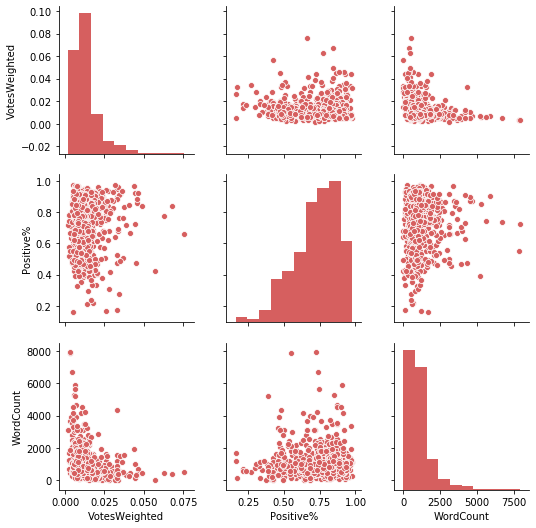

In [70]:
sns.pairplot(data=df[['VotesWeighted', 'Positive%', 'WordCount']])

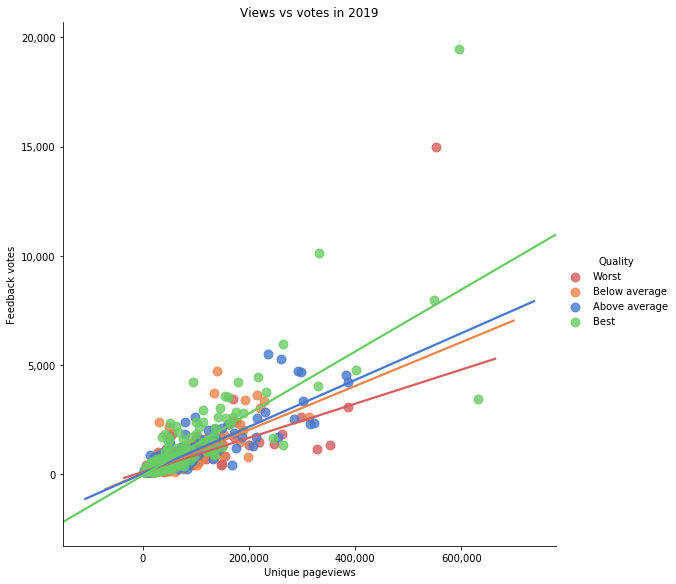

In [63]:
my_palette = [(0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
           (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
           (0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
              (0.41568627450980394, 0.8, 0.39215686274509803)]

chart = sns.lmplot(x = 'UniquePageviews', 
            y = 'TotalVotes',
            data = df, 
            height = 8, 
            ci=None, 
            robust = True,
            scatter_kws={"s": 80}, hue = 'Quality', palette = my_palette)

chart.set(title = 'Views vs votes in 2019', xlabel='Unique pageviews', ylabel='Feedback votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)


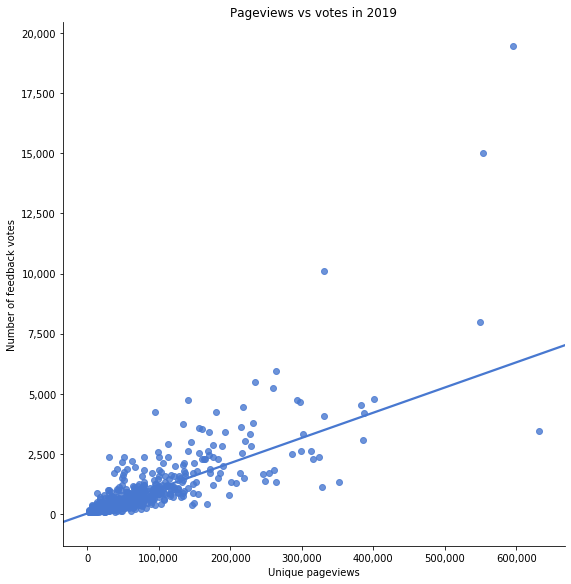

In [80]:
sns.set_palette('muted')
chart = sns.lmplot(x = 'UniquePageviews', 
            y = 'TotalVotes',
            data = df, 
            height = 8, 
            ci=None,
            robust = True)

chart.set(title = 'Pageviews vs votes in 2019', xlabel='Unique pageviews', ylabel='Number of feedback votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)


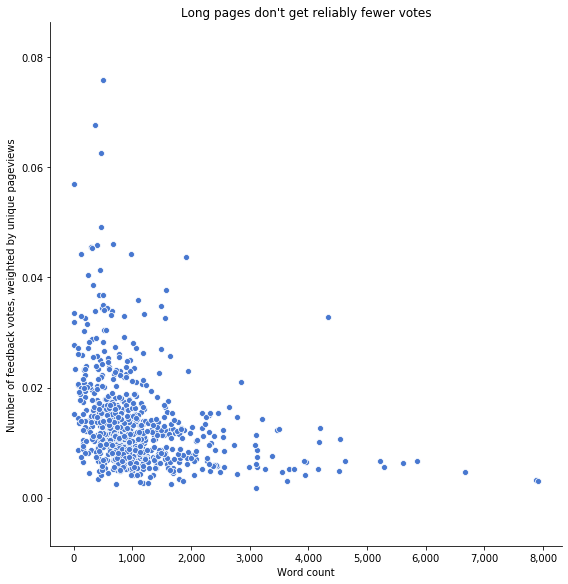

In [98]:
sns.set_palette('muted')
chart = sns.relplot(x = 'WordCount', 
            y = 'VotesWeighted',
            data = df, height = 8)

chart.set(title = "Long pages don't get reliably fewer votes", xlabel='Word count', ylabel='Number of feedback votes, weighted by unique pageviews')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

chart.set_xticklabels(xlabels)


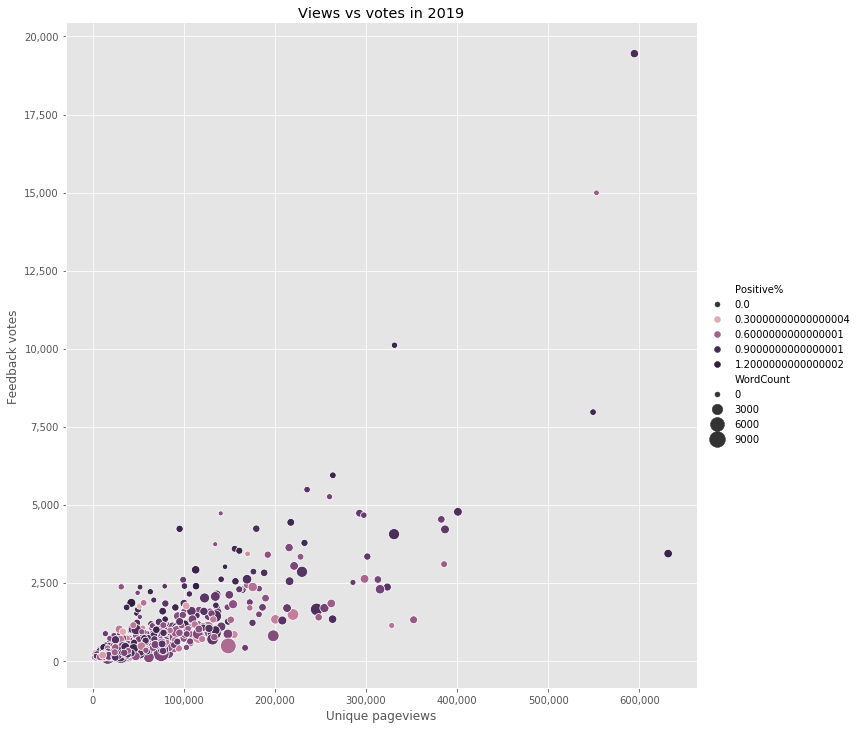

In [54]:
chart = sns.relplot(x='UniquePageviews', 
            y='TotalVotes', 
            hue='Positive%', 
            data=df,
            size='WordCount',
            sizes=(25,250),
            height = 10)

chart.set(title = 'Views vs votes in 2019', xlabel='Unique pageviews', ylabel='Feedback votes')
ticks_x = chart.axes[0][0].get_xticks()
xlabels = ['{:,.0f}'.format(x) for x in ticks_x]

ticks_y = chart.axes[0][0].get_yticks()
ylabels = ['{:,.0f}'.format(y) for y in ticks_y]

chart.set_xticklabels(xlabels)
chart.set_yticklabels(ylabels)
